<a href="https://colab.research.google.com/github/hariomvyas/MLProjects/blob/main/CreditCard_Payment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Load the dataset
file_path = '/content/UCI_Credit_Card.csv'
data_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data_df.head()

In [ ]:
# Data Preparation
# Define features and target variable
X = data_df.drop(['default.payment.next.month', 'ID'], axis=1)
y = data_df['default.payment.next.month']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a Logistic Regression Model
clf = LogisticRegression(max_iter=1000, random_state=0).fit(X_train, y_train)

# Setup the Cost Matrix
costs = np.array([[0, 1], [5, 0]])

def compute_average_cost(costs, threshold, X_test, y_test, clf):
    """
    Computes the average cost for given costs, threshold, features, labels, and classifier.
    """
    X_test_proba = clf.predict_proba(X_test)
    X_test_pred = X_test_proba[:, 1] >= threshold
    cm = confusion_matrix(y_test, X_test_pred)
    num_examples = np.sum(cm)
    return np.sum(np.multiply(costs, cm)) / num_examples

def compute_mean_classification_error(threshold, X_test, y_test, clf):
    """
    Computes the mean classification error for given threshold, features, labels, and classifier.
    """
    X_test_proba = clf.predict_proba(X_test)
    X_test_pred = X_test_proba[:, 1] >= threshold
    cm = confusion_matrix(y_test, X_test_pred)
    num_examples = np.sum(cm)
    return (cm[0, 1] + cm[1, 0]) / num_examples

# Testing the code with the default threshold of 0.5
average_cost_default = compute_average_cost(costs, 0.5, X_test, y_test, clf)
mean_classification_error_default = compute_mean_classification_error(0.5, X_test, y_test, clf)

average_cost_default, mean_classification_error_default

(1.08989898989899, 0.21797979797979797)

In [ ]:
# Compute average costs and mean classification errors for a range of thresholds
thresholds = np.arange(0, 1.05, 0.05)
average_costs = [compute_average_cost(costs, threshold, X_test, y_test, clf) for threshold in thresholds]
mean_classification_errors = [compute_mean_classification_error(threshold, X_test, y_test, clf) for threshold in thresholds]

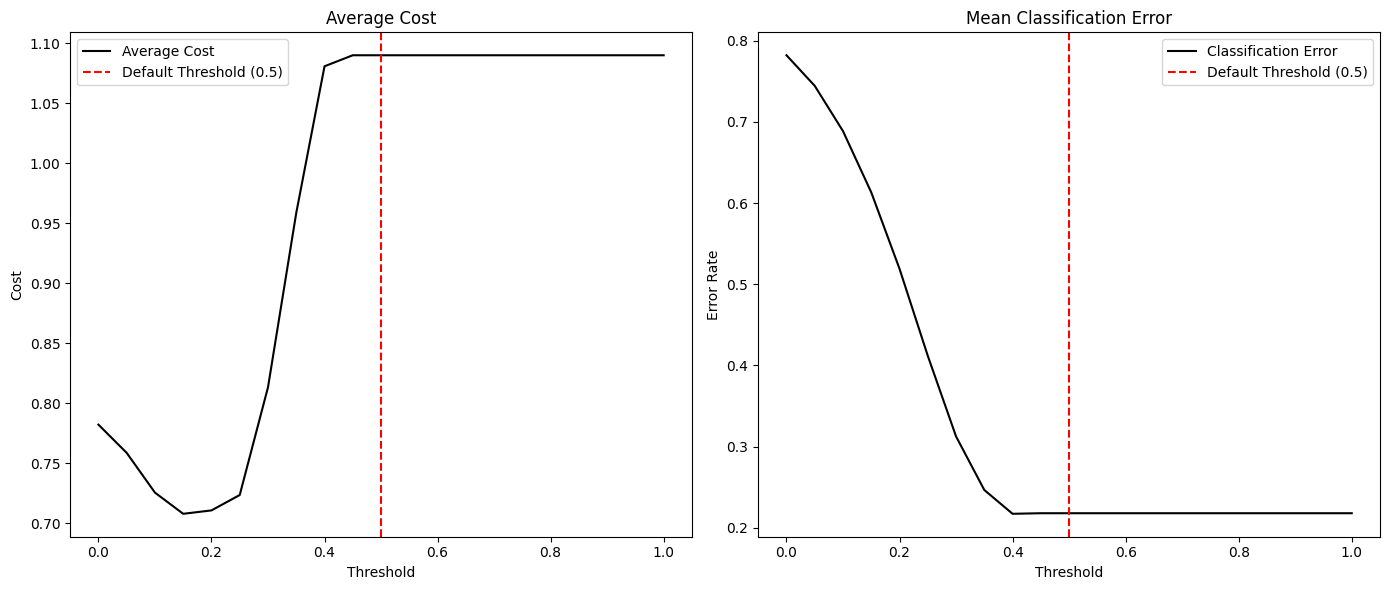

In [ ]:
# Visualization
plt.figure(figsize=(14, 6))

# Plot for the average cost
plt.subplot(121)
plt.title('Average Cost')
plt.plot(thresholds, average_costs, 'k-', label='Average Cost')
plt.axvline(x=0.5, color='r', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.legend()

# Plot for the mean classification error
plt.subplot(122)
plt.title('Mean Classification Error')
plt.plot(thresholds, mean_classification_errors, 'k-', label='Classification Error')
plt.axvline(x=0.5, color='r', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.legend()

plt.tight_layout()
plt.show()